In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble,\
                    neural_network, svm, decomposition, manifold
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV



from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [2]:
delays_df = dmba.load_data('FlightDelays.csv')

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

# create hourly bins departure time 
delays_df.CRS_DEP_TIME = [round(t / 200) for t in delays_df.CRS_DEP_TIME] # 8구간으로 나누기
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')


In [3]:

delays_df['isDelayed'] = [1 if status == 'delayed' else 0 
                          for status in delays_df['Flight Status']]

In [4]:

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category') #DAY_WEEK를 범주형으로 변경

In [5]:
delays_df = delays_df.drop(columns=['DEP_TIME', 'DAY_OF_MONTH']) #DEP_TIME과 DAY_OF_MONTH는 제외하기


In [6]:

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
outcome = 'isDelayed'

In [7]:

X = pd.get_dummies(delays_df[predictors])
y = delays_df[outcome]
classes = ['ontime', 'delayed']

In [8]:

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)  #검증셋 40% 학습셋 60%

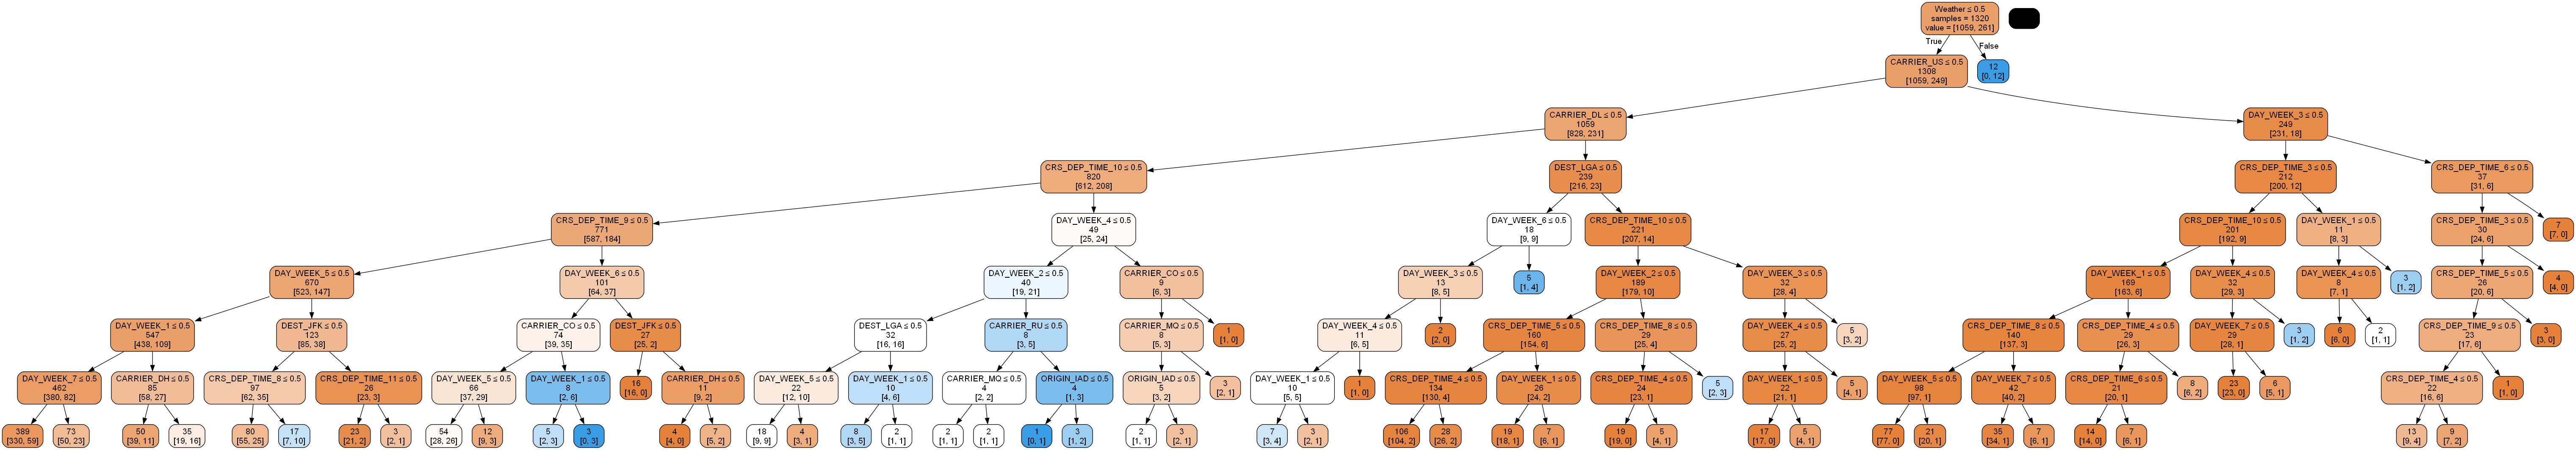

In [9]:
fullClassTree = DecisionTreeClassifier( max_depth=8) #깊이 8의 트리
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

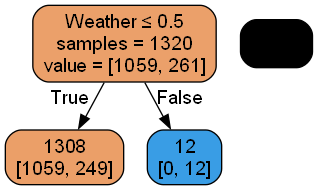

In [10]:
smallClassTree = DecisionTreeClassifier( max_depth=8, min_impurity_decrease=0.01) #깊이 8에 불순도감소 0.01의 트리
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [11]:
print("가지치기 하지 않은 트리의 컨퓨전 매트릭스")
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))
# 컨퓨전 매트릭스 출력
print("가지치기 수행한 트리의 컨퓨전 매트릭스")
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))
# 컨퓨전 매트릭스 출력

가지치기 하지 않은 트리의 컨퓨전 매트릭스
Confusion Matrix (Accuracy 0.8250)

       Prediction
Actual    0    1
     0 1038   21
     1  210   51
Confusion Matrix (Accuracy 0.8116)

       Prediction
Actual   0   1
     0 681  33
     1 133  34
가지치기 수행한 트리의 컨퓨전 매트릭스
Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual    0    1
     0 1059    0
     1  249   12
Confusion Matrix (Accuracy 0.8331)

       Prediction
Actual   0   1
     0 714   0
     1 147  20


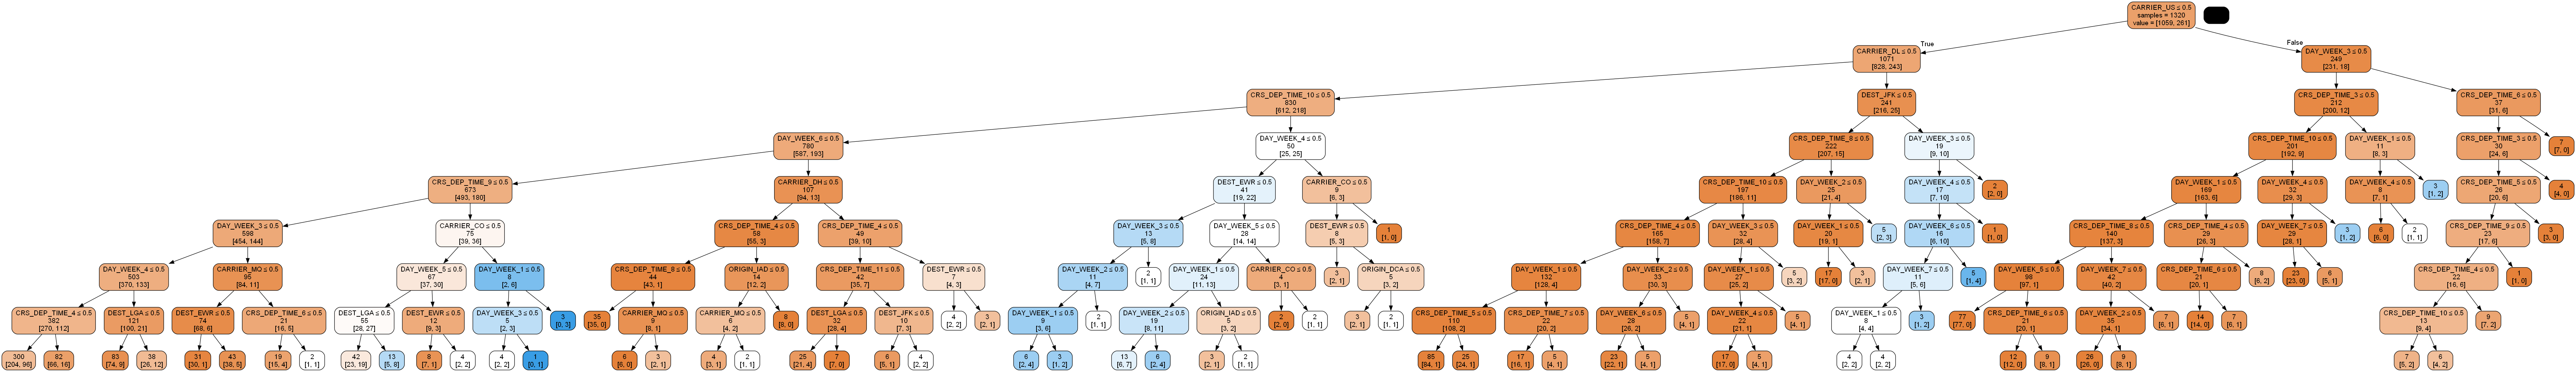

In [12]:
nw_df = delays_df.drop(columns=['Weather']) #DEP_TIME과 DAY_OF_MONTH는 제외하기
nw_predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']

nw_X = pd.get_dummies(nw_df[nw_predictors])
nw_y = nw_df[outcome]

nw_train_X, nw_valid_X, nw_train_y, nw_valid_y = train_test_split(nw_X, nw_y, test_size=0.4, random_state=1) 

nw_fullClassTree = DecisionTreeClassifier( max_depth=8) 
nw_fullClassTree.fit(nw_train_X, nw_train_y)

plotDecisionTree(nw_fullClassTree, feature_names=nw_train_X.columns)

In [13]:
print(nw_X.info())
#print(nw_y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DAY_WEEK_1       2201 non-null   uint8
 1   DAY_WEEK_2       2201 non-null   uint8
 2   DAY_WEEK_3       2201 non-null   uint8
 3   DAY_WEEK_4       2201 non-null   uint8
 4   DAY_WEEK_5       2201 non-null   uint8
 5   DAY_WEEK_6       2201 non-null   uint8
 6   DAY_WEEK_7       2201 non-null   uint8
 7   CRS_DEP_TIME_3   2201 non-null   uint8
 8   CRS_DEP_TIME_4   2201 non-null   uint8
 9   CRS_DEP_TIME_5   2201 non-null   uint8
 10  CRS_DEP_TIME_6   2201 non-null   uint8
 11  CRS_DEP_TIME_7   2201 non-null   uint8
 12  CRS_DEP_TIME_8   2201 non-null   uint8
 13  CRS_DEP_TIME_9   2201 non-null   uint8
 14  CRS_DEP_TIME_10  2201 non-null   uint8
 15  CRS_DEP_TIME_11  2201 non-null   uint8
 16  ORIGIN_BWI       2201 non-null   uint8
 17  ORIGIN_DCA       2201 non-null   uint8
 18  ORIGIN_I

월요일 오전 7시에 DCA에서 EWR로 비행을 한다면 아래와 같은 조건일 것입니다. 

In [14]:
example = X.copy()
example.drop(X.index,inplace=True)

example.loc[0, 'DAY_WEEK_1'] = 1
example.loc[0, 'CRS_DEP_TIME_4'] = 1
example.loc[0, 'ORIGIN_DCA'] = 1
example.loc[0, 'DEST_EWR'] = 1
example.loc[0, 'Weather'] = 1 #

example.fillna(0, inplace=True)

print(example)

result = fullClassTree.predict(example)
print(result)
#1이 연착 0이 정상도착

   Weather  DAY_WEEK_1  DAY_WEEK_2  DAY_WEEK_3  DAY_WEEK_4  DAY_WEEK_5  \
0      1.0         1.0         0.0         0.0         0.0         0.0   

   DAY_WEEK_6  DAY_WEEK_7  CRS_DEP_TIME_3  CRS_DEP_TIME_4  ...  DEST_JFK  \
0         0.0         0.0             0.0             1.0  ...       0.0   

   DEST_LGA  CARRIER_CO  CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  \
0       0.0         0.0         0.0         0.0         0.0         0.0   

   CARRIER_RU  CARRIER_UA  CARRIER_US  
0         0.0         0.0         0.0  

[1 rows x 31 columns]
[1]


결과는 정상도착으로 예측됩니다. <br>
그러나 <b>이 결과의 신뢰도가 높지 않다</b>고 생각하는 이유는 <br>
훈련데이터 개수입니다.<br>
훈련 데이터 중 월요일 오전 7시에 DCA에서 EWR로 비행을 한 데이터는 <b>5건</b>이며 <br>
이 중 <b>1건만이 연착</b>이고 연착된 데이터만이 기상악화변수가 1입니다.<br>
위 코드에서 Weather를 0으로 하는지 1로 하는지에 따라 예측결과가 달라집니다. 


In [15]:
example2 = nw_X.copy()
example2.drop(nw_X.index,inplace=True)

example2.loc[0, 'DAY_WEEK_1'] = 1
example2.loc[0, 'CRS_DEP_TIME_4'] = 1
example2.loc[0, 'ORIGIN_DCA'] = 1
example2.loc[0, 'DEST_EWR'] = 1

example2.fillna(0, inplace=True)

print(example2)

result2 = nw_fullClassTree.predict(example2)
print(result2)
#1이 연착 0이 정상도착

   DAY_WEEK_1  DAY_WEEK_2  DAY_WEEK_3  DAY_WEEK_4  DAY_WEEK_5  DAY_WEEK_6  \
0         1.0         0.0         0.0         0.0         0.0         0.0   

   DAY_WEEK_7  CRS_DEP_TIME_3  CRS_DEP_TIME_4  CRS_DEP_TIME_5  ...  DEST_JFK  \
0         0.0             0.0             1.0             0.0  ...       0.0   

   DEST_LGA  CARRIER_CO  CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  \
0       0.0         0.0         0.0         0.0         0.0         0.0   

   CARRIER_RU  CARRIER_UA  CARRIER_US  
0         0.0         0.0         0.0  

[1 rows x 30 columns]
[0]


Weather가 빠진 모델의 경우 시간을 바꾸거나 요일을 바꾸더라도 정상도착으로만 예측되고있습니다.

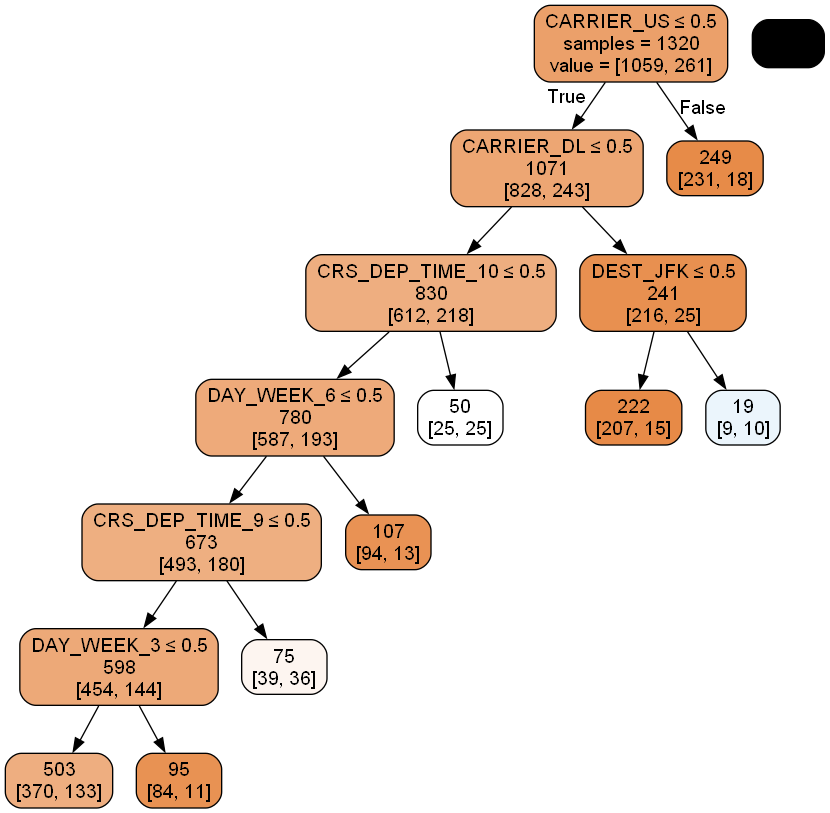

In [16]:
nw_df = delays_df.drop(columns=['Weather']) #DEP_TIME과 DAY_OF_MONTH는 제외하기
nw_predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']

nw_X = pd.get_dummies(nw_df[nw_predictors])
nw_y = nw_df[outcome]

nw_train_X, nw_valid_X, nw_train_y, nw_valid_y = train_test_split(nw_X, nw_y, test_size=0.4, random_state=1) 

nw_smallClassTree = DecisionTreeClassifier( max_depth=8, min_impurity_decrease=0.002) #깊이 8의 트리 불순도 감소 0.002로 변경해보았습니다
nw_smallClassTree.fit(nw_train_X, nw_train_y)

plotDecisionTree(nw_smallClassTree, feature_names=nw_train_X.columns)

In [17]:
from sklearn.tree import export_text

tree_rules = export_text(nw_smallClassTree, feature_names=list(nw_X.columns))
print(tree_rules)

importances = nw_smallClassTree.feature_importances_
feature_names = nw_X.columns  

# 중요도가 높은 순으로 규칙 출력
for feature, importance in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

|--- CARRIER_US <= 0.50
|   |--- CARRIER_DL <= 0.50
|   |   |--- CRS_DEP_TIME_10 <= 0.50
|   |   |   |--- DAY_WEEK_6 <= 0.50
|   |   |   |   |--- CRS_DEP_TIME_9 <= 0.50
|   |   |   |   |   |--- DAY_WEEK_3 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DAY_WEEK_3 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- CRS_DEP_TIME_9 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- DAY_WEEK_6 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- CRS_DEP_TIME_10 >  0.50
|   |   |   |--- class: 0
|   |--- CARRIER_DL >  0.50
|   |   |--- DEST_JFK <= 0.50
|   |   |   |--- class: 0
|   |   |--- DEST_JFK >  0.50
|   |   |   |--- class: 1
|--- CARRIER_US >  0.50
|   |--- class: 0

CARRIER_US: 0.2031384439635027
CARRIER_DL: 0.1984225703049974
CRS_DEP_TIME_9: 0.16040181797848013
DEST_JFK: 0.15494857582574748
CRS_DEP_TIME_10: 0.12608953111653948
DAY_WEEK_6: 0.08274540685756741
DAY_WEEK_3: 0.07425365395316545
DAY_WEEK_1: 0.0
DAY_WEEK_2: 0.0
DAY_WEEK_4: 0.0


분류나무 모델의 규칙은 중요도와 동일합니다.

In [18]:
from sklearn.tree import export_text

tree_rules = export_text(nw_fullClassTree, feature_names=list(nw_X.columns))
print(tree_rules)

importances = nw_fullClassTree.feature_importances_
feature_names = nw_X.columns  

# 중요도가 높은 순으로 규칙 출력
for feature, importance in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

|--- CARRIER_US <= 0.50
|   |--- CARRIER_DL <= 0.50
|   |   |--- CRS_DEP_TIME_10 <= 0.50
|   |   |   |--- DAY_WEEK_6 <= 0.50
|   |   |   |   |--- CRS_DEP_TIME_9 <= 0.50
|   |   |   |   |   |--- DAY_WEEK_3 <= 0.50
|   |   |   |   |   |   |--- DAY_WEEK_4 <= 0.50
|   |   |   |   |   |   |   |--- CRS_DEP_TIME_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- CRS_DEP_TIME_4 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DAY_WEEK_4 >  0.50
|   |   |   |   |   |   |   |--- DEST_LGA <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DEST_LGA >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DAY_WEEK_3 >  0.50
|   |   |   |   |   |   |--- CARRIER_MQ <= 0.50
|   |   |   |   |   |   |   |--- DEST_EWR <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DEST_EWR >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |  

가지치기 되지 않은 나무모델의 가장 좋은 3개의 예측변수<br>
CARRIER_US: 0.11125499727552808<br>
CARRIER_DL: 0.10867220447278807<br>
DEST_JFK: 0.09210338457980638<br>

가지치기 된 나무모델과 가지치기 하지 않은 나무모델의 최상위 수준은 <br>
현재  동일한 조건으로 확인되나 현재 데이터에서만 그런 결과가 나왔을 수 있고 실제로는 다른 결과를 낼 수 있습니다.<br>
그리고 가지치기 하지 않은 모델을 사용할 경우 과적합의 문제가 발생할 수 있을것이라고 생각됩니다.